In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_ivp
from scipy.special import hermite

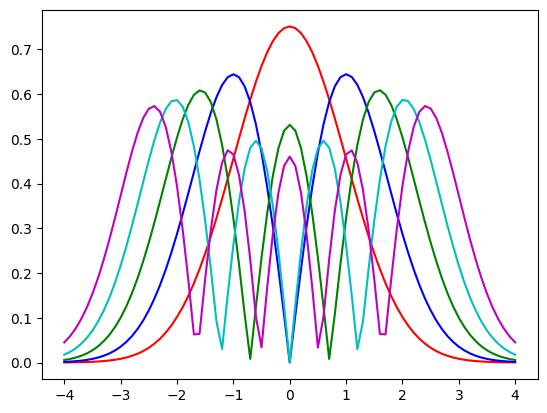

In [ ]:
# Part a
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm', 'k'] 
A = 1
L = 4
xshoot = np.linspace(-L, L, 81)

def shoot2(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

epsilon_list = [0.1]
epsilon_start = epsilon_list[0]
eigenfunction_list = []
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.2
    for _ in range(1000): 
        y0 = [A, np.sqrt(L**2 - epsilon)]
        y = solve_ivp(shoot2, [xshoot[0], xshoot[-1]], y0, t_eval=xshoot, args=(epsilon,))
        y = y.y.T
        if abs(y[-1, 1] +  np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:
            epsilon_list.append(epsilon) 
            break 
        if (-1) ** (modes + 1) * (y[-1, 1] +  np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 0.1 

    norm = np.trapezoid((y[:, 0]) * (y[:, 0]), xshoot)
    eigenfunction_list.append(abs(y[:, 0]) / np.sqrt(norm))
    
    plt.plot(xshoot, eigenfunction_list[modes - 1], col[modes - 1])
eigenfunction_matrix = np.column_stack(eigenfunction_list)

In [3]:
A1 = eigenfunction_matrix
A2 = epsilon_list[-5:]

print(A1)
print(A2)

[[2.56023908e-04 1.45261190e-03 5.65783873e-03 1.74247034e-02
  4.49716541e-02]
 [3.76704668e-04 2.08090003e-03 7.87406356e-03 2.34942195e-02
  5.85268010e-02]
 [5.51333049e-04 2.96477386e-03 1.08973736e-02 3.14957085e-02
  7.57119111e-02]
 [8.00736395e-04 4.19027275e-03 1.49549870e-02 4.18498820e-02
  9.70292818e-02]
 [1.15230933e-03 5.86545728e-03 2.03156030e-02 5.50069971e-02
  1.22892293e-01]
 [1.64247145e-03 8.12654770e-03 2.72920161e-02 7.14286436e-02
  1.53600245e-01]
 [2.31906176e-03 1.11444492e-02 3.62571650e-02 9.16072532e-02
  1.89280537e-01]
 [3.24162496e-03 1.51206884e-02 4.76086454e-02 1.15975906e-01
  2.29811529e-01]
 [4.48522818e-03 2.02874785e-02 6.17600352e-02 1.44840204e-01
  2.74657391e-01]
 [6.14601739e-03 2.69273187e-02 7.91314209e-02 1.78373546e-01
  3.22845863e-01]
 [8.33948492e-03 3.53568208e-02 1.00165628e-01 2.16551309e-01
  3.72969027e-01]
 [1.12001712e-02 4.59112671e-02 1.25213944e-01 2.59055528e-01
  4.23187886e-01]
 [1.48905387e-02 5.89394455e-02 1.545129

A3 [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 1.541

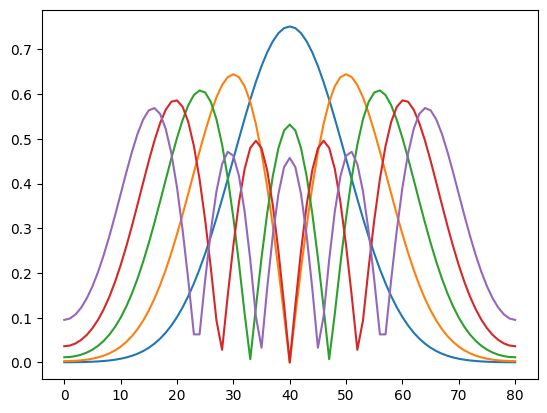

In [ ]:
# Part b
L = 4
N = 79
k = 1
x = np.linspace(-L, L, N+2)
dx = 0.1
A = np.zeros((N, N))
for j in range(N):
    A[j, j] = -2
for j in range(N - 1):
    A[j, j + 1] = 1
    A[j + 1, j] = 1

A[0, 0] = -2/3
A[0, 1] = 2/3
A[-1, -2] = 2/3
A[-1, -1] = -2/3

A = A / (dx ** 2)

P = np.zeros((N, N))
for j in range(N):
    P[j, j] = k * x[j + 1] ** 2 



linL = -A + P

linL = csr_matrix(linL)
eigenval,V = eigs(linL, k=5, which="SM")
phi0 = 4/3 * V[0, :] - 1/3 * V[1, :]
phiN = 4/3 * V[-1, :] - 1/3 * V[-2, :]
V = np.real(np.vstack([phi0, V, phiN]))

for i in range(5): 
    norm = np.trapezoid((V[:, i]) * (V[:, i]), x)
    V[:, i] = (abs(V[:, i]) / np.sqrt(norm))
    plt.plot(V[:, i])

A3 = V
A4 = eigenval.real
print("A3", A3)
print("A4", A4)

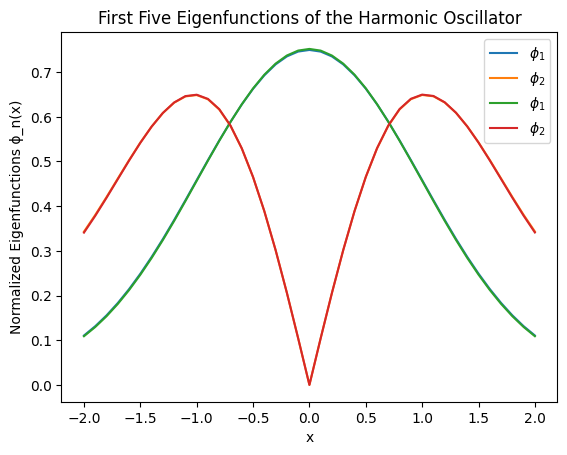

A5 [[1.10632401e-01 3.42995987e-01]
 [1.31425452e-01 3.80308372e-01]
 [1.55620741e-01 4.20317753e-01]
 [1.83285244e-01 4.61688409e-01]
 [2.14395026e-01 5.02884359e-01]
 [2.48815413e-01 5.42261741e-01]
 [2.86300988e-01 5.78068810e-01]
 [3.26495596e-01 6.08445935e-01]
 [3.69025012e-01 6.31547722e-01]
 [4.13247276e-01 6.45555100e-01]
 [4.58248955e-01 6.48574054e-01]
 [5.03110823e-01 6.39164073e-01]
 [5.46908748e-01 6.16356304e-01]
 [5.88713689e-01 5.79653551e-01]
 [6.27591697e-01 5.29030280e-01]
 [6.62603917e-01 4.64985072e-01]
 [6.92806585e-01 3.88673754e-01]
 [7.17251030e-01 3.01714850e-01]
 [7.35085963e-01 2.06172940e-01]
 [7.45920093e-01 1.04560066e-01]
 [7.49523358e-01 1.64269229e-04]
 [7.45833671e-01 1.04717062e-01]
 [7.34963288e-01 2.06225201e-01]
 [7.17198809e-01 3.01773569e-01]
 [6.93001177e-01 3.88808918e-01]
 [6.63005676e-01 4.65218872e-01]
 [6.28021935e-01 5.29331931e-01]
 [5.89032820e-01 5.79940683e-01]
 [5.47101151e-01 6.16579292e-01]
 [5.03237672e-01 6.39353212e-01]
 [4.584

In [ ]:
# Part c
def shoot2(x, y, epsilon, gamma):
    return [y[1], (gamma * np.abs(y[0])**2 + x**2 - epsilon) * y[0]]

L = 2
xshoot =  np.arange(-L, L + 0.1, 0.1)
tol = 1e-4
gamma_vals = [0.05, -0.05]
epsilon_list = [0]
eigenfun = []
A5 = np.zeros((41,2))
A6 = []
A7 = np.zeros((41,2))
A8 = []


for gamma in gamma_vals:
    epsilon_start = epsilon_list[0]
    A = 0.01
    for mode in range(1, 3): 
        dA = 0.01
        for _ in range(10000):
            epsilon = epsilon_start 
            depsilon = 0.2
            for _ in range(10000): 
                y0 = [A, A * np.sqrt(L**2 - epsilon)]
                y_sol = solve_ivp(lambda x, y: shoot2(x, y, epsilon, gamma), 
                            [xshoot[0], xshoot[-1]], y0, t_eval=xshoot)
                y = y_sol.y.T
                if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:
                    break 
                if (-1) ** (mode + 1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2
            area =np.trapezoid(y[:, 0]**2, x=y_sol.t)
            if abs(area - 1) < tol:
                break
            if area - 1 < 0:
                A += dA
            else:
                A = A - (dA/2)
                dA /= 2
        epsilon_start = epsilon + 0.2
        eigenfun.append(abs(y[:, 0]) / np.sqrt(area))
        plt.plot(xshoot, eigenfun[-1], label=f'$\\phi_{mode}$')
        if gamma > 0:
            A5[:, mode-1] = (abs(y[:, 0]))
            A6.append(epsilon)
        else:
            A7[:, mode-1] = (abs(y[:, 0]))
            A8.append(epsilon)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions ϕ_n(x)')
plt.title('First Five Eigenfunctions of the Harmonic Oscillator')
plt.legend()
plt.show()

print("A5", A5)
print("A6", A6)
print("A7", A7)
print("A8", A8)

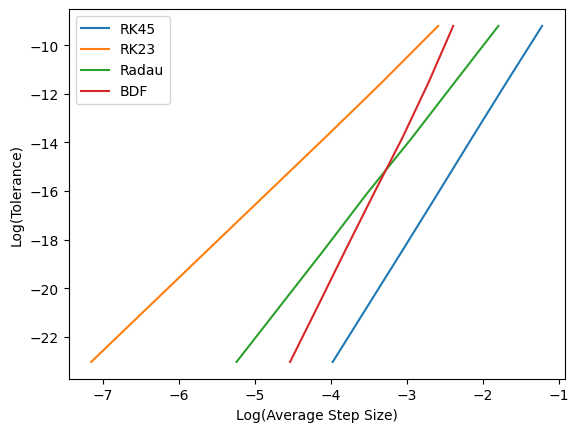

Slopes: [5.02166842 3.01641991 4.00505583 6.37597853]


In [ ]:
# Part d
def hw1_rhs_a(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 2
x_span = np.arange(-L, L+0.1, 0.1)
epsilon = 1
y0 = [1, np.sqrt(L**2 - epsilon)] 
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
methods = ['RK45', 'RK23', 'Radau', 'BDF']
slopes = []

for method in methods:
    avg_step_sizes = []

    for tol in tolerances:
        options = {'rtol': tol, 'atol': tol}
        sol = solve_ivp(hw1_rhs_a, [xshoot[0], xshoot[-1]], y0, method=method, args=(epsilon,), **options)
        
        step_sizes = np.diff(sol.t)
        avg_step_size = np.mean(step_sizes)
        avg_step_sizes.append(avg_step_size)
    
    log_tols = np.log(tolerances)
    log_step_sizes = np.log(avg_step_sizes)
    slope, _ = np.polyfit(log_step_sizes, log_tols, 1)
    slopes.append(slope)

    plt.plot(log_step_sizes, log_tols, label=f"{method}")

plt.ylabel("Log(Tolerance)")
plt.xlabel("Log(Average Step Size)")
plt.legend()
plt.show()

slopes_vector = np.array(slopes).reshape(4, 1)
A9 = slopes_vector.flatten()
print("A9:", A9)

In [ ]:
# Part e
def factorial(n):
    fac = 1
    x = 1
    for _ in range(n):
        fac = fac * x
        x += 1
    return fac

tol = 1e-4
L = 4
xshoot = np.linspace(-L, L, 81)
epsilon_exact = []
fun_error_a_vec = np.zeros(5)
val_error_a_vec = np.zeros(5)
fun_error_b_vec = np.zeros(5)
val_error_b_vec = np.zeros(5)
for n in range (5):
    epsilon_exact.append(2*n + 1)
    Hn = hermite(n)
    eigfun = np.exp(-xshoot**2 / 2) * Hn(xshoot) / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    fun_error_a = abs(A1[:, n]) - abs(eigfun)
    fun_error_a_vec[n] = np.trapezoid((fun_error_a)**2, xshoot)
    eps_error_a = abs(A2[n] - (2*n + 1))
    val_error_a_vec[n] = 100 * eps_error_a / (2*n + 1)
    fun_error_b = abs(A3[:, n]) - abs(eigfun)
    fun_error_b_vec[n] = np.trapezoid((fun_error_b)**2, xshoot)
    eps_error_b = abs(A4[n] - (2*n + 1))
    val_error_b_vec[n] = 100 * eps_error_b / (2*n + 1)
A10 = fun_error_a_vec
A11 = val_error_a_vec
A12 = fun_error_b_vec
A13 = val_error_b_vec
print("A10", A10)
print("A11", A11)
print("A12", A12)
print("A13", A13)

A10 [4.57692773e-08 1.72430976e-07 2.47860414e-07 4.35413370e-07
 1.96490590e-06]
A11 [0.02642089 0.03324661 0.03073889 0.03455707 0.04161944]
A12 [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A13 [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
